# Chapter 4: Machine learning

Applying machine learning models to predict disease groups (CD, UC, nonIBD) as the target variable (Y), using bacterial counts (X) as input features.

## 4.1 Logistic regression

### 4.1.1 Data preprocessing

In [1]:
#loading in libraries

import numpy as np
import pandas as pd

In [2]:
#list all the files under the input directory in Kaggle

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/project-lsa/genera.counts.tsv
/kaggle/input/project-lsa/metadata.tsv
/kaggle/input/datasets-microbiome/genera.counts.tsv
/kaggle/input/datasets-microbiome/metadata.tsv


In [3]:
#Load in the genera_counts dataset as a dataframe and look at the first five rows

genera_counts = pd.read_csv('/kaggle/input/project-lsa/genera.counts.tsv', sep = '\t')
genera_counts.head()

,Sample,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Vicingaceae;g__BCD18,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__Flemingibacterium,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__F0428,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Acidaminobacteraceae;g__Fusibacter_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoanaerobaculum,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Carnobacteriaceae;g__Carnobacterium_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__GCA-900066755,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Oleiphilaceae;g__Tamilnaduibacter,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__Monoglobus,...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Paralactobacillus,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Acetobacterales;f__Acetobacteraceae;g__JAFKFI01,d__Bacteria;p__Bacteroidota;c__Chlorobia;o__Chlorobiales;f__Chloroherpetonaceae;g__GBChlB,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Propionibacteriales;f__Actinopolymorphaceae;g__Tenggerimyces,d__Bacteria;p__Patescibacteria;c__ABY1;o__UBA1558;f__GWA2-36-10;g__JABHSK01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Tepidibacillales;f__Tepidibacillaceae;g__Vulcanibacillus,d__Bacteria;p__Acidobacteriota;c__UBA6911;o__UBA6911;f__UBA6911;g__JAAYAM01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Aerococcaceae;g__Ignavigranum,d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__UBA4665;g__PMNU01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Acetilactobacillus
0,MSM5LLDS,0,25,0,0,53,12,158,0,145,...,0,0,0,0,0,0,0,0,0,0
1,ESM5MEBE,0,25,21,0,155,0,470,0,19,...,0,0,0,0,0,0,0,0,0,0
2,MSM6J2IQ,0,93,58,0,346,0,446,0,36,...,0,0,0,0,0,0,0,0,0,0
3,HSM5MD62,0,44,18,0,181,0,183,0,20,...,0,0,0,0,0,0,0,0,0,0
4,HSM5MD5D,0,51,539,0,456,0,2774,0,3657,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Load in the metadata dataset as a dataframe and look at the first five rows

metadata = pd.read_csv('/kaggle/input/project-lsa/metadata.tsv', sep = '\t')
metadata.head()

,Dataset,Sample,Subject,Study.Group,Gender,DOI,Publication.Name,consent_age,Age.Units,site_sub_coll,...,visit_num,site_name,Age at diagnosis,Antibiotics,race,fecalcal,BMI_at_baseline,Height_at_baseline,Weight_at_baseline,smoking status
0,iHMP_IBDMDB_2019,CSM5MCVN,C3002,CD,Female,10.1038/s41586-019-1237-9,Multi-omics of the gut microbial ecosystem in ...,76.0,Years,C3002C9,...,13,Cedars-Sinai,47.0,No,White,15.97901,NaN,NaN,NaN,NaN
1,iHMP_IBDMDB_2019,CSM5MCWE,C3009,CD,Male,10.1038/s41586-019-1237-9,Multi-omics of the gut microbial ecosystem in ...,56.0,Years,C3009C5,...,8,Cedars-Sinai,44.0,No,White,20.64059,NaN,NaN,NaN,NaN
2,iHMP_IBDMDB_2019,CSM5MCX3,C3006,UC,Male,10.1038/s41586-019-1237-9,Multi-omics of the gut microbial ecosystem in ...,32.0,Years,C3006C9,...,13,Cedars-Sinai,24.0,No,White,12.69817,20.1,180.0,65.0,Never smoked
3,iHMP_IBDMDB_2019,CSM5MCXL,C3004,UC,Female,10.1038/s41586-019-1237-9,Multi-omics of the gut microbial ecosystem in ...,47.0,Years,C3004C9,...,13,Cedars-Sinai,33.0,No,White,14.82410,NaN,NaN,NaN,NaN
4,iHMP_IBDMDB_2019,CSM5MCY8,C3005,UC,Female,10.1038/s41586-019-1237-9,Multi-omics of the gut microbial ecosystem in ...,76.0,Years,C3005C9,...,13,Cedars-Sinai,58.0,No,White,229.04730,30.9,165.0,84.0,Former smoker


In [5]:
#Creating a new dataframe X that contains the genera_counts dataframe without the "Sample" column 
#Look at the first five rows

X = genera_counts.iloc[:,1:] 
X.head()

,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Vicingaceae;g__BCD18,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__Flemingibacterium,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__F0428,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Acidaminobacteraceae;g__Fusibacter_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoanaerobaculum,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Carnobacteriaceae;g__Carnobacterium_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__GCA-900066755,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Oleiphilaceae;g__Tamilnaduibacter,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__Monoglobus,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Rhizobiaceae;g__Pararhizobium,...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Paralactobacillus,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Acetobacterales;f__Acetobacteraceae;g__JAFKFI01,d__Bacteria;p__Bacteroidota;c__Chlorobia;o__Chlorobiales;f__Chloroherpetonaceae;g__GBChlB,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Propionibacteriales;f__Actinopolymorphaceae;g__Tenggerimyces,d__Bacteria;p__Patescibacteria;c__ABY1;o__UBA1558;f__GWA2-36-10;g__JABHSK01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Tepidibacillales;f__Tepidibacillaceae;g__Vulcanibacillus,d__Bacteria;p__Acidobacteriota;c__UBA6911;o__UBA6911;f__UBA6911;g__JAAYAM01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Aerococcaceae;g__Ignavigranum,d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__UBA4665;g__PMNU01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Acetilactobacillus
0,0,25,0,0,53,12,158,0,145,0,...,0,0,0,0,0,0,0,0,0,0
1,0,25,21,0,155,0,470,0,19,11,...,0,0,0,0,0,0,0,0,0,0
2,0,93,58,0,346,0,446,0,36,25,...,0,0,0,0,0,0,0,0,0,0
3,0,44,18,0,181,0,183,0,20,0,...,0,0,0,0,0,0,0,0,0,0
4,0,51,539,0,456,0,2774,0,3657,0,...,0,0,0,0,0,0,0,0,0,0


The dataframe X now contains 9694 columns of different bacteria.

"Study.Group" is the only relevant column in the dataframe metadata. Therefore, only this column will be selected for further analysis.


In [6]:
#Select the column 'Study.Group' from the dataset metadata and create a series variable named 'Study_group'

Study_group = metadata['Study.Group']
Study_group

0      CD
1      CD
2      UC
3      UC
4      UC
       ..
377    UC
378    UC
379    UC
380    UC
381    UC
Name: Study.Group, Length: 382, dtype: object

In [7]:
#Check if the three study groups are evenly distributed

unique, counts = np.unique(Study_group, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{'CD': 177, 'UC': 101, 'nonIBD': 104}


Based on the output above, we can conclude that there is some imbalance across the study groups, with a higher representation of CD compared to UC and nonIBD. This imbalance should be carefully considered when training the logistic regression model, as it may influence the model's performance, potentially favoring the majority class (CD) over the others.

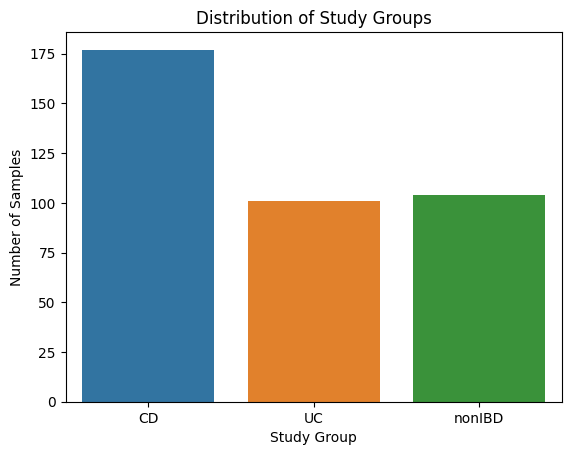

In [8]:
#Visualize the distribution above with a histogram

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=Study_group)
plt.title('Distribution of Study Groups')
plt.xlabel('Study Group')
plt.ylabel('Number of Samples')
plt.show()

The histogram clearly illustrates the imbalance across the study groups. It shows that there are significantly more samples in the CD group compared to the two other groups. The number of samples in the UC and nonIBD groups, however, is nearly identical.


The scikit-learn library will be used to create the machine learning models, this requires all input variables to be in numeric format: ['CD' = 0, 'UC' = 1, 'nonIBD' = 2].


In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
# Fit the encoder to the Study_group labels and transform them into numeric values
y = encoder.fit_transform(Study_group)

print(y)  
mapping = {i: label for i, label in enumerate(encoder.classes_)}
print('Mapping:', mapping)

[0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 2 0 2 0 0 0 0 1 0 0 0 0 0 1
 1 1 0 0 2 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 2 0 1 1 1 0 0 0 1 0 0 0
 0 1 1 1 0 0 1 1 1 1 1 0 0 0 2 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 2 0 0
 0 2 0 0 0 0 0 0 0 2 2 2 2 2 2 1 0 2 2 0 0 2 1 2 0 0 0 0 1 1 1 2 2 0 0 0 0
 0 0 2 0 2 0 0 0 0 0 2 1 2 1 1 2 2 0 0 2 0 0 1 1 2 2 2 0 2 2 0 1 1 0 0 0 0
 0 1 2 2 0 0 0 1 0 0 0 2 2 2 0 0 0 1 1 1 0 1 2 1 1 1 1 0 0 2 0 0 1 2 2 0 0
 0 0 1 2 0 0 0 0 2 2 0 0 0 0 2 0 0 1 1 0 2 2 2 0 2 0 0 2 2 2 2 0 2 2 1 1 2
 2 2 2 2 2 2 2 1 1 2 2 2 1 1 0 2 0 0 1 2 2 2 2 2 2 2 2 1 1 0 2 2 2 2 1 1 2
 2 2 2 1 2 2 1 1 0 1 0 1 2 2 0 2 2 1 1 1 0 2 2 2 2 0 0 1 1 2 2 2 1 2 0 0 1
 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 2 2 0 2 2 0 2 0 0 2 1 0 0 2 1 1 0 0 0 1 2
 0 0 1 0 0 1 1 1 1 1 1 1]
Mapping: {0: 'CD', 1: 'UC', 2: 'nonIBD'}


Split the data into training and validation data, for both features and target. The split is based on a random number generator. Supplying a numeric value to the random_state argument guarantees we get the same split every time we run the script.

In [10]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 2)

In [11]:
#Get a summary of descriptive statistics for the dataset train_X

train_X.describe()

,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Vicingaceae;g__BCD18,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__Flemingibacterium,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__F0428,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Acidaminobacteraceae;g__Fusibacter_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoanaerobaculum,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Carnobacteriaceae;g__Carnobacterium_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__GCA-900066755,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Oleiphilaceae;g__Tamilnaduibacter,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__Monoglobus,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Rhizobiaceae;g__Pararhizobium,...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Paralactobacillus,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Acetobacterales;f__Acetobacteraceae;g__JAFKFI01,d__Bacteria;p__Bacteroidota;c__Chlorobia;o__Chlorobiales;f__Chloroherpetonaceae;g__GBChlB,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Propionibacteriales;f__Actinopolymorphaceae;g__Tenggerimyces,d__Bacteria;p__Patescibacteria;c__ABY1;o__UBA1558;f__GWA2-36-10;g__JABHSK01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Tepidibacillales;f__Tepidibacillaceae;g__Vulcanibacillus,d__Bacteria;p__Acidobacteriota;c__UBA6911;o__UBA6911;f__UBA6911;g__JAAYAM01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Aerococcaceae;g__Ignavigranum,d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__UBA4665;g__PMNU01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Acetilactobacillus
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,...,286.0,286.0,286.0,286.0,286.0,286.000000,286.000000,286.000000,286.000000,286.000000
mean,0.713287,582.465035,82.213287,3.758741,256.437063,8.125874,1279.363636,0.419580,1422.416084,17.311189,...,0.0,0.0,0.0,0.0,0.0,0.038462,0.034965,0.034965,0.045455,0.048951
std,5.059120,2202.818091,116.911062,8.914477,255.800871,16.815977,2034.730225,4.110598,5066.954326,98.864843,...,0.0,0.0,0.0,0.0,0.0,0.650444,0.591312,0.591312,0.768706,0.827837
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,14.000000,22.000000,0.000000,77.500000,0.000000,275.750000,0.000000,20.250000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,32.000000,48.000000,0.000000,183.500000,0.000000,683.000000,0.000000,86.500000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,85.500000,93.000000,0.000000,332.000000,12.000000,1449.250000,0.000000,732.750000,18.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,57.000000,19386.000000,1137.000000,76.000000,1956.000000,142.000000,19750.000000,59.000000,44717.000000,1658.000000,...,0.0,0.0,0.0,0.0,0.0,11.000000,10.000000,10.000000,13.000000,14.000000


It can be seen in the table above that that there are columns where the maximum bacterial count equals zero. This means that the bacterium isn't detected in the samples present in the training dataframe. Therefore, these features will not provide additional information for the model so they can be deleted. The same columns deleted in the train dataframe, need to be deleted in the test dataframe.

In [12]:
#Identify the columns in train_X for which the sum of all the values in the column is zero
columns_to_remove = train_X.columns[(train_X.sum(axis=0) == 0)]

#Delete those colums from both the train_X and test_X dataframes
train_X_filtered = train_X.drop(columns=columns_to_remove)
test_X_filtered = test_X.drop(columns=columns_to_remove)

print(f"Number of deleted columns: {len(columns_to_remove)}")
print(f'Percentage of deleted columns: {(len(columns_to_remove)/9694)*100 : .2f}%')


Number of deleted columns: 383
Percentage of deleted columns:  3.95%


There were 383 columns deleted, but this is only 3.95% of the columns from the original dataframe.

In [13]:
#Check if the distribution in the different study groups in train_y is still imbalanced after spliting
unique, counts = np.unique(train_y, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{0: 135, 1: 73, 2: 78}


Based on the output above, we can conclude that there is still an imbalance across the study groups, with a higher representation of CD compared to UC and nonIBD. As said earlier, this imbalance should be carefully considered when training the logistic regression model, as it may influence the model's performance, potentially favoring the CD study group over the others.

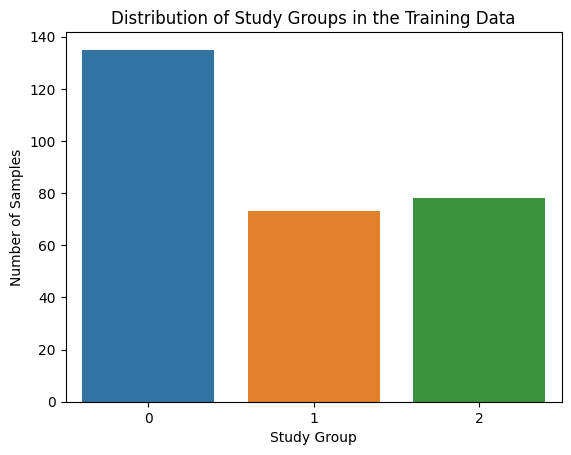

In [14]:
#Visualize the distribution above with a histogram
sns.countplot(x=train_y)
plt.title('Distribution of Study Groups in the Training Data')
plt.xlabel('Study Group')
plt.ylabel('Number of Samples')
plt.show()

The histogram shows that the distribution of the study groups remains relatively imbalanced, similar to the original dataset. There are significantly more samples in the CD group compared to the UC and nonIBD groups. However, the number of samples in the UC and nonIBD groups is nearly identical.

Logistic regression requires standardised data. The distribution of ten random columns of the train_X dataset is visualised using boxplots to check if the condition of standardised data is met. Supplying a numeric value to the random_state argument guarantees we get the same ten random columns every time we run the script.
When making the boxplots after standardisation, the same random state will be used. This way we can compare the unstandardised boxplot to the standardised boxplot.

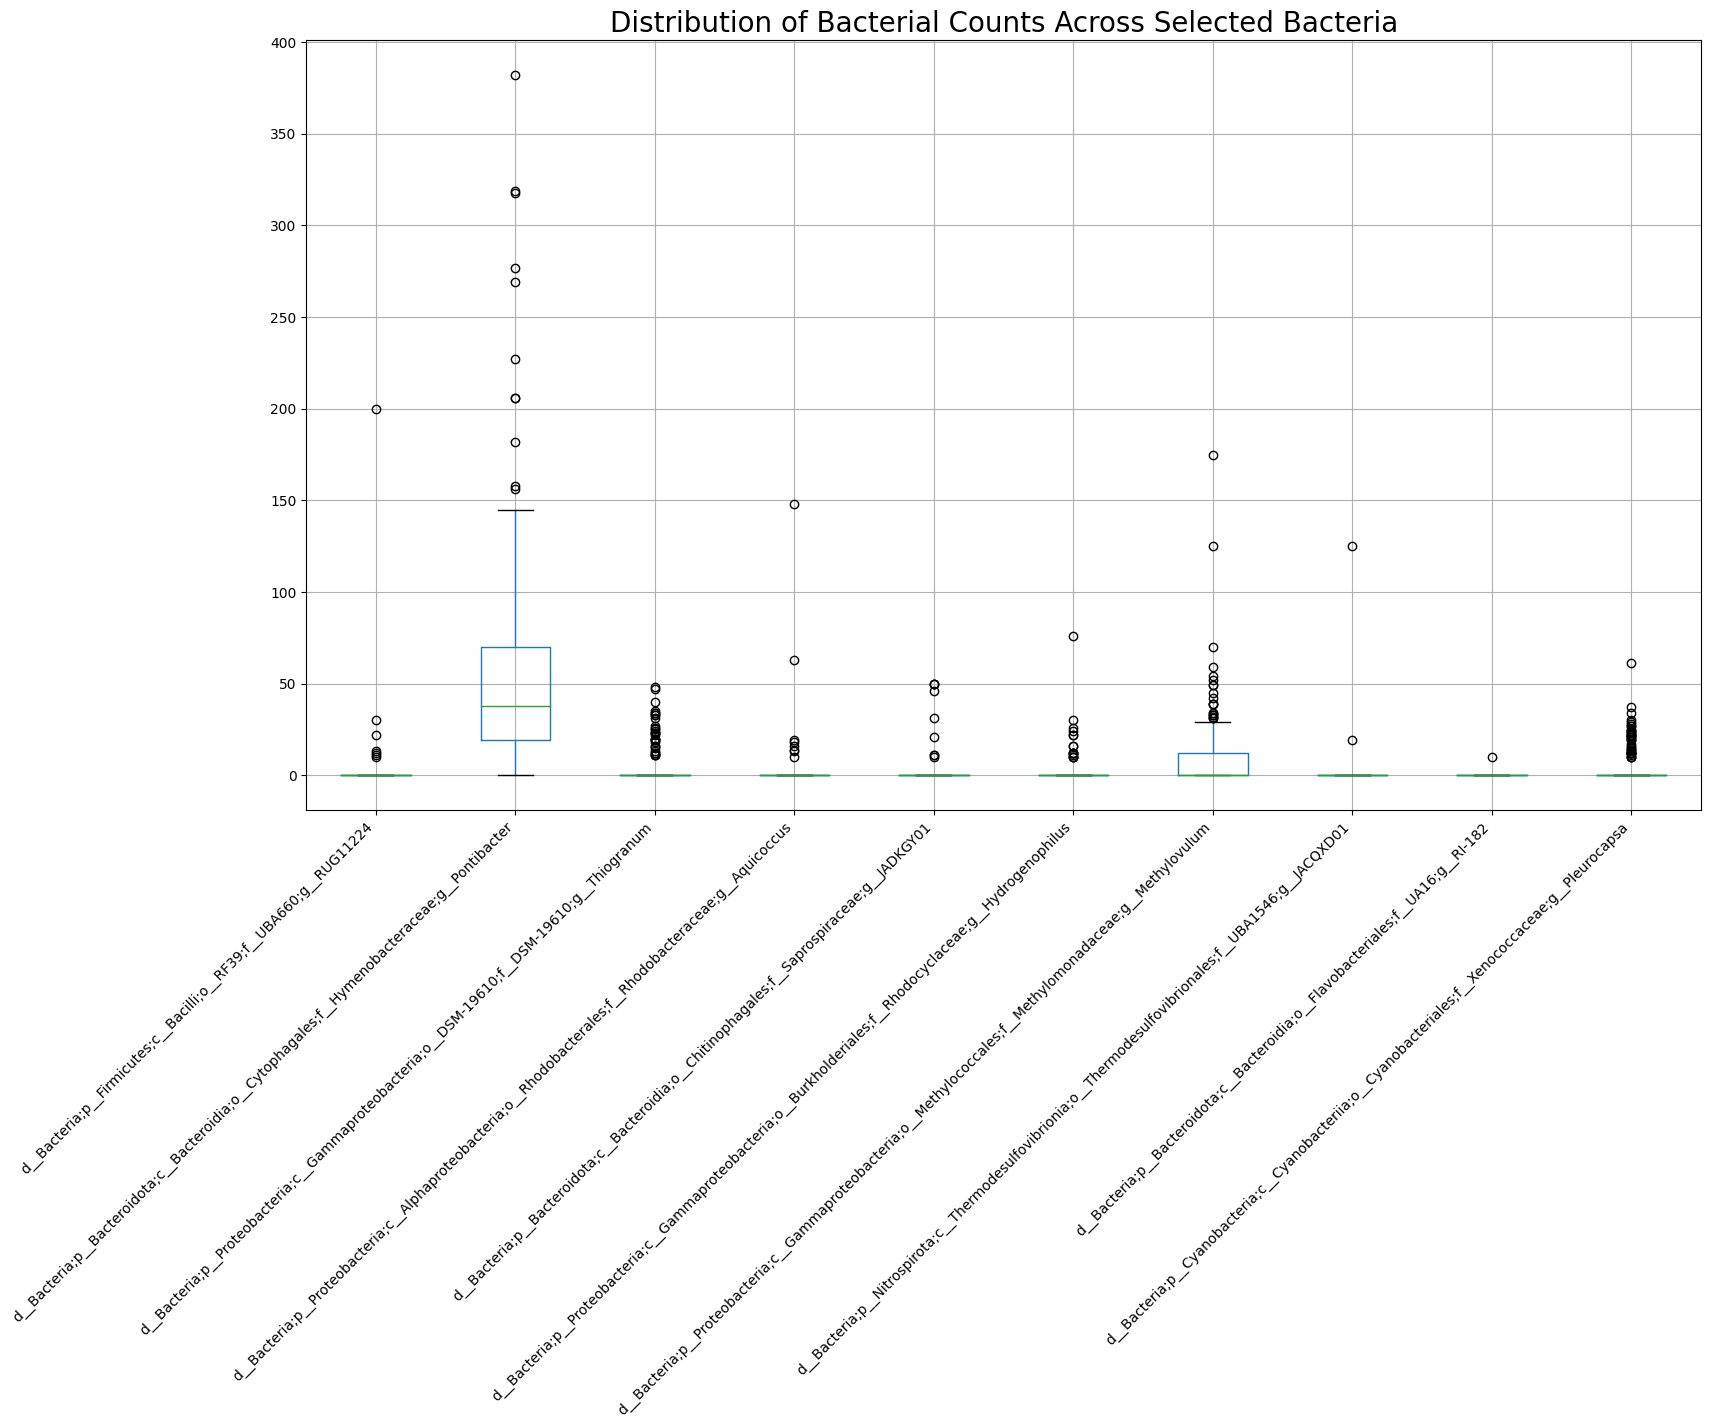

In [15]:
plt.figure(figsize=(18,10))
plt.title('Distribution of Bacterial Counts Across Selected Bacteria', fontsize = 20)
train_X_filtered.sample(10, axis="columns", random_state = 10).boxplot()
plt.xticks(rotation=45, ha = 'right')
plt.show()

In [16]:
#Get a summary of descriptive statistics for the dataset train_X_filtered
train_X_filtered.describe()

,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Vicingaceae;g__BCD18,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__Flemingibacterium,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__F0428,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Acidaminobacteraceae;g__Fusibacter_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoanaerobaculum,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Carnobacteriaceae;g__Carnobacterium_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__GCA-900066755,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Oleiphilaceae;g__Tamilnaduibacter,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__Monoglobus,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Rhizobiaceae;g__Pararhizobium,...,d__Bacteria;p__Dependentiae;c__Babeliae;o__Babeliales;f__Vermiphilaceae;g__AWTP1-30,d__Bacteria;p__Chloroflexota;c__Anaerolineae;o__Anaerolineales;f__DRMV01;g__JAADEN01,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Beijerinckiaceae;g__REEB77,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Ichthyobacteriaceae;g__Ichthyobacterium,d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Atopobiaceae;g__RGIG4373,d__Bacteria;p__Firmicutes;c__Bacilli;o__Tepidibacillales;f__Tepidibacillaceae;g__Vulcanibacillus,d__Bacteria;p__Acidobacteriota;c__UBA6911;o__UBA6911;f__UBA6911;g__JAAYAM01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Aerococcaceae;g__Ignavigranum,d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__UBA4665;g__PMNU01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Acetilactobacillus
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,...,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,0.713287,582.465035,82.213287,3.758741,256.437063,8.125874,1279.363636,0.419580,1422.416084,17.311189,...,0.038462,0.097902,0.052448,0.041958,0.048951,0.038462,0.034965,0.034965,0.045455,0.048951
std,5.059120,2202.818091,116.911062,8.914477,255.800871,16.815977,2034.730225,4.110598,5066.954326,98.864843,...,0.650444,1.195399,0.886969,0.709575,0.827837,0.650444,0.591312,0.591312,0.768706,0.827837
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,14.000000,22.000000,0.000000,77.500000,0.000000,275.750000,0.000000,20.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,32.000000,48.000000,0.000000,183.500000,0.000000,683.000000,0.000000,86.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,85.500000,93.000000,0.000000,332.000000,12.000000,1449.250000,0.000000,732.750000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57.000000,19386.000000,1137.000000,76.000000,1956.000000,142.000000,19750.000000,59.000000,44717.000000,1658.000000,...,11.000000,17.000000,15.000000,12.000000,14.000000,11.000000,10.000000,10.000000,13.000000,14.000000


The boxplot and the table above illustrate the wide range of bacterial counts in the dataset, varying from zero to several thousand. Some bacteria have a high number of zero counts, indicating that they are present in only a few samples. This pattern may influence model predictions later. For now, the dataframe will be kept as it is, but it's important to keep this potential issue in mind if the model performance is not optimal.


Using StandardScaler to standardise the data, each feature will have a mean of 0 and a standard deviation of 1, making the data more uniform and suitable for machine learning algorithms that are sensitive to feature scales.

In [17]:
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()
scaler_std.fit(train_X_filtered) 
print("Means:")
print(scaler_std.mean_)
print("Variances:")
print(scaler_std.var_)

Means:
[7.13286713e-01 5.82465035e+02 8.22132867e+01 ... 3.49650350e-02
 4.54545455e-02 4.89510490e-02]
Variances:
[2.55052081e+01 4.83544108e+06 1.36204056e+04 ... 3.48427796e-01
 5.88842975e-01 6.82918480e-01]


The fit() method computes the mean and variance of each feature in the training dataset. The means and variances above will be used to transform the dataset in the code below.

In [18]:
train_X_filtered_std = scaler_std.transform(train_X_filtered)

train_X_filtered_std

array([[-0.1412374 , -0.24851026,  0.94927634, ..., -0.05923489,
        -0.05923489, -0.05923489],
       [ 5.60103199, -0.24077935, -0.26745116, ..., -0.05923489,
        -0.05923489, -0.05923489],
       [-0.1412374 , -0.25123882, -0.32743068, ..., -0.05923489,
        -0.05923489, -0.05923489],
       ...,
       [-0.1412374 ,  0.9124912 , -0.11321809, ..., -0.05923489,
        -0.05923489, -0.05923489],
       [-0.1412374 , -0.23941507,  0.24665905, ..., -0.05923489,
        -0.05923489, -0.05923489],
       [-0.1412374 , -0.25851498, -0.70444484, ..., -0.05923489,
        -0.05923489, -0.05923489]])

In [19]:
#Transforming train_X_filtered_std into a dataframe

train_X_filtered_std = pd.DataFrame(train_X_filtered_std, columns=train_X_filtered.columns)
train_X_filtered_std

,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Vicingaceae;g__BCD18,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__Flemingibacterium,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__F0428,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Acidaminobacteraceae;g__Fusibacter_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoanaerobaculum,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Carnobacteriaceae;g__Carnobacterium_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__GCA-900066755,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Oleiphilaceae;g__Tamilnaduibacter,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__Monoglobus,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Rhizobiaceae;g__Pararhizobium,...,d__Bacteria;p__Dependentiae;c__Babeliae;o__Babeliales;f__Vermiphilaceae;g__AWTP1-30,d__Bacteria;p__Chloroflexota;c__Anaerolineae;o__Anaerolineales;f__DRMV01;g__JAADEN01,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Beijerinckiaceae;g__REEB77,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Ichthyobacteriaceae;g__Ichthyobacterium,d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Atopobiaceae;g__RGIG4373,d__Bacteria;p__Firmicutes;c__Bacilli;o__Tepidibacillales;f__Tepidibacillaceae;g__Vulcanibacillus,d__Bacteria;p__Acidobacteriota;c__UBA6911;o__UBA6911;f__UBA6911;g__JAAYAM01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Aerococcaceae;g__Ignavigranum,d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__UBA4665;g__PMNU01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Acetilactobacillus
0,-0.141237,-0.248510,0.949276,-0.422384,2.559446,-0.484070,0.220384,-0.102252,-0.249979,0.037377,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235
1,5.601032,-0.240779,-0.267451,-0.422384,-0.017376,-0.484070,-0.285236,-0.102252,-0.180388,-0.013286,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235
2,-0.141237,-0.251239,-0.327431,-0.422384,-0.111364,-0.484070,0.548766,-0.102252,-0.264214,-0.175406,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235
3,-0.141237,-0.238506,0.837886,-0.422384,-0.040873,0.171216,-0.431950,-0.102252,-0.220126,0.209630,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235
4,-0.141237,-0.248056,-0.704445,3.847817,-0.275842,2.375361,-0.442781,-0.102252,-0.260655,-0.175406,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,-0.141237,-0.255786,-0.010396,-0.422384,-0.593049,0.886074,-0.502845,-0.102252,-0.281216,-0.175406,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235
282,-0.141237,-0.253513,-0.276020,-0.422384,-0.158357,0.469073,0.232199,-0.102252,-0.281216,-0.175406,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235
283,-0.141237,0.912491,-0.113218,-0.422384,0.123605,-0.484070,-0.267513,-0.102252,0.869614,-0.053816,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235
284,-0.141237,-0.239415,0.246659,-0.422384,0.440813,0.349930,0.334111,-0.102252,-0.267377,-0.074081,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235


In [20]:
#Get a summary of descriptive statistics for the dataset train_X_filtered_std
train_X_filtered_std.describe()

,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Vicingaceae;g__BCD18,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__Flemingibacterium,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__F0428,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Acidaminobacteraceae;g__Fusibacter_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoanaerobaculum,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Carnobacteriaceae;g__Carnobacterium_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__GCA-900066755,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Oleiphilaceae;g__Tamilnaduibacter,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__Monoglobus,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Rhizobiaceae;g__Pararhizobium,...,d__Bacteria;p__Dependentiae;c__Babeliae;o__Babeliales;f__Vermiphilaceae;g__AWTP1-30,d__Bacteria;p__Chloroflexota;c__Anaerolineae;o__Anaerolineales;f__DRMV01;g__JAADEN01,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Beijerinckiaceae;g__REEB77,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Ichthyobacteriaceae;g__Ichthyobacterium,d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Atopobiaceae;g__RGIG4373,d__Bacteria;p__Firmicutes;c__Bacilli;o__Tepidibacillales;f__Tepidibacillaceae;g__Vulcanibacillus,d__Bacteria;p__Acidobacteriota;c__UBA6911;o__UBA6911;f__UBA6911;g__JAAYAM01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Aerococcaceae;g__Ignavigranum,d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__UBA4665;g__PMNU01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Acetilactobacillus
count,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,...,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02
mean,-3.105519e-17,-1.863311e-17,5.589934e-17,7.763797e-19,1.552759e-17,-4.968830e-17,5.667572e-17,1.242208e-17,2.484415e-17,6.211038e-18,...,-6.211038e-18,9.316557e-18,1.863311e-17,2.484415e-17,3.105519e-17,4.347727e-17,1.863311e-17,1.863311e-17,1.863311e-17,3.105519e-17
std,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,...,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00
min,-1.412374e-01,-2.648816e-01,-7.044448e-01,-4.223837e-01,-1.004244e+00,-4.840705e-01,-6.298654e-01,-1.022518e-01,-2.812161e-01,-1.754065e-01,...,-5.923489e-02,-8.204267e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02
25%,-1.412374e-01,-2.585150e-01,-5.159378e-01,-4.223837e-01,-7.007432e-01,-4.840705e-01,-4.941062e-01,-1.022518e-01,-2.772127e-01,-1.754065e-01,...,-5.923489e-02,-8.204267e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02
50%,-1.412374e-01,-2.503293e-01,-2.931567e-01,-4.223837e-01,-2.856320e-01,-4.840705e-01,-2.936060e-01,-1.022518e-01,-2.641148e-01,-1.754065e-01,...,-5.923489e-02,-8.204267e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02
75%,-1.412374e-01,-2.259997e-01,9.242599e-02,-4.223837e-01,2.959153e-01,2.307875e-01,8.363966e-02,-1.022518e-01,-1.363492e-01,6.979413e-03,...,-5.923489e-02,-8.204267e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02,-5.923489e-02
max,1.114529e+01,8.551090e+00,9.037944e+00,8.118018e+00,6.655732e+00,7.975081e+00,9.093595e+00,1.427605e+01,8.559476e+00,1.662436e+01,...,1.688194

In the table above, it can be seen that each feature now has a mean around 0 and a variance around 1.

The distribution of the bacterial counts across the ten randomly selected bacteria after standardisation will be checked. The same random state as above is used to be able to compare both boxplot visualisations (from before and after standardisation).

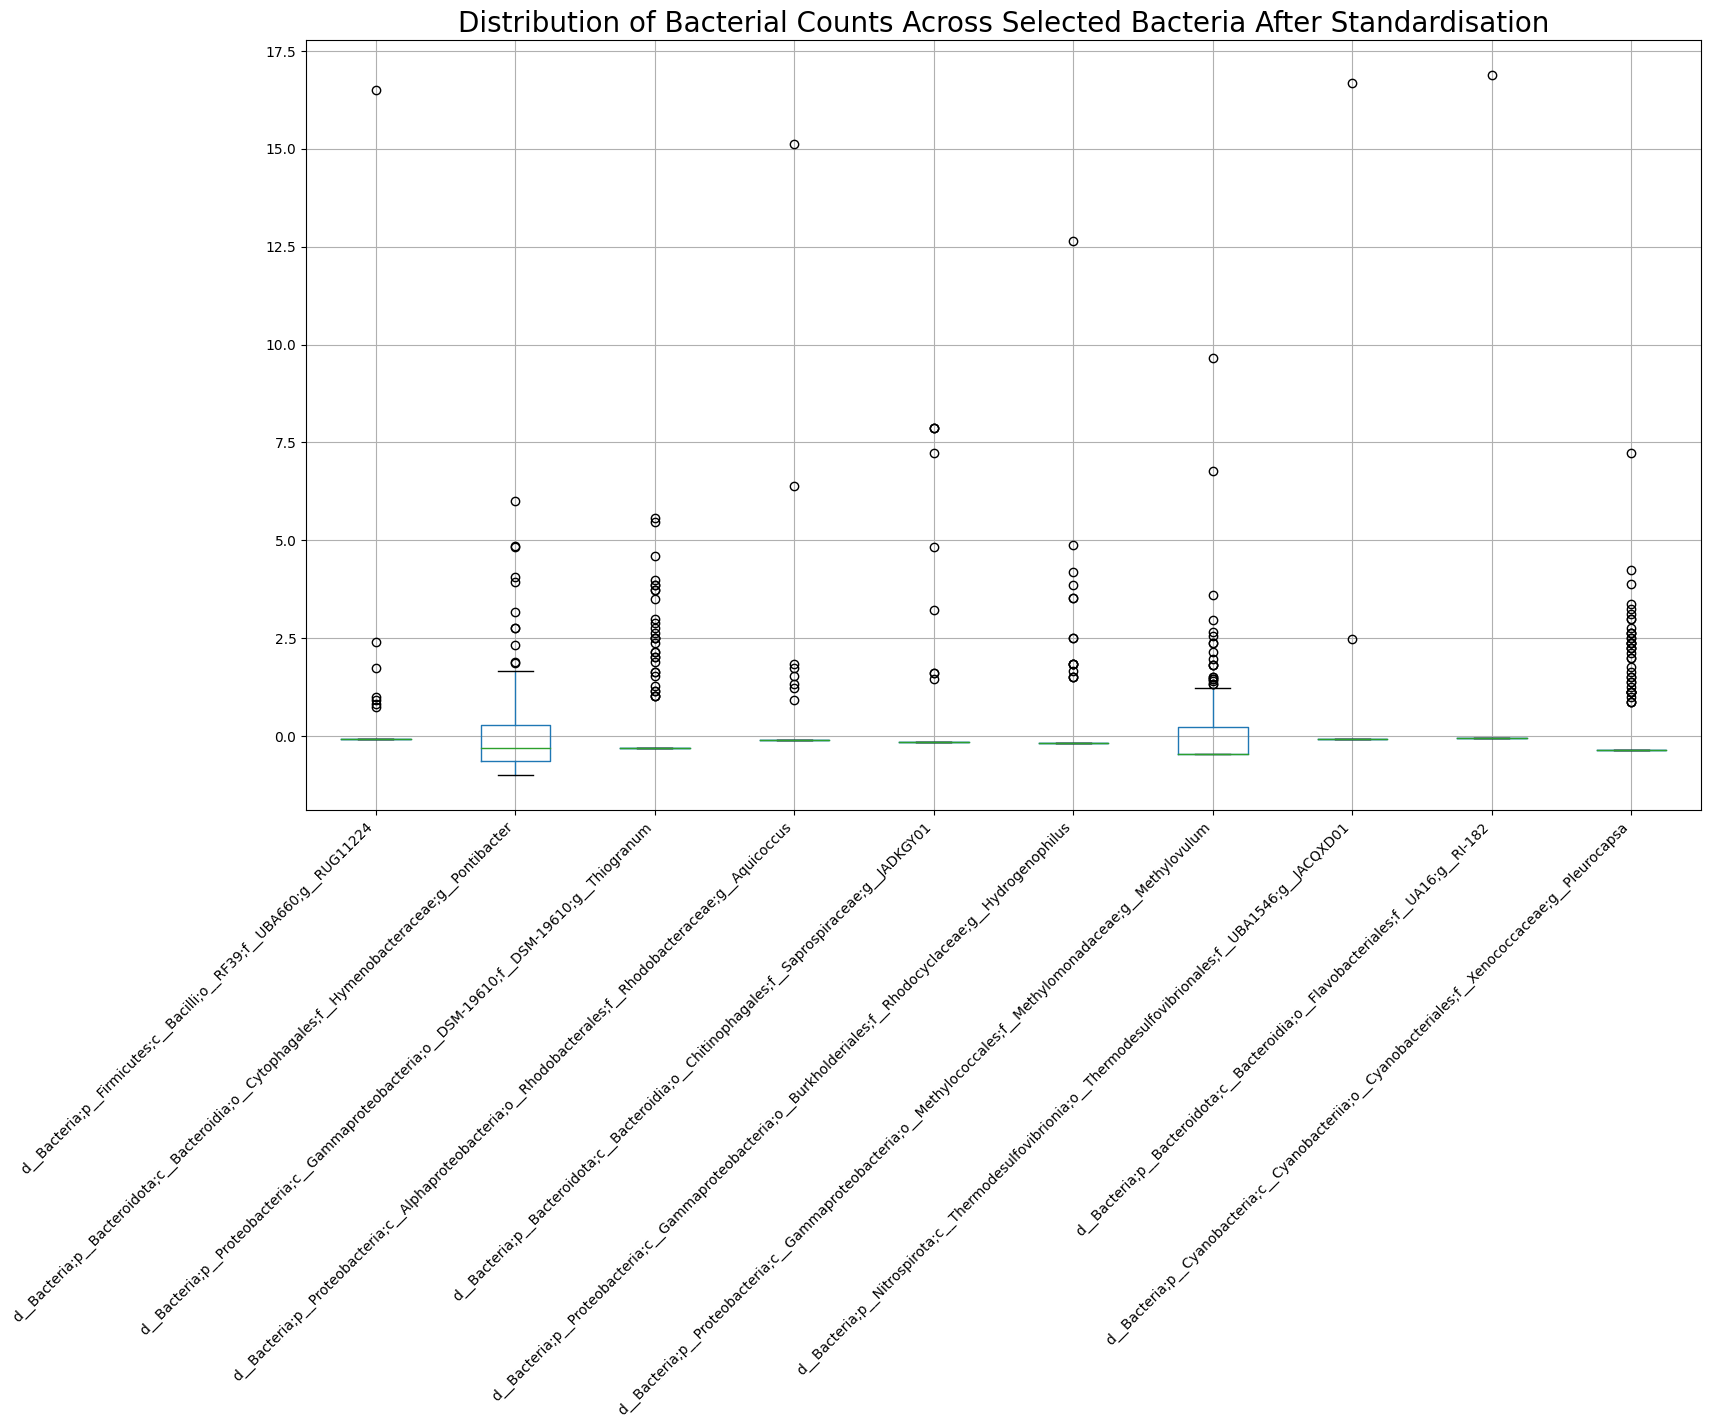

In [21]:
plt.figure(figsize=(18,10))
plt.title('Distribution of Bacterial Counts Across Selected Bacteria After Standardisation', fontsize = 20)
train_X_filtered_std.sample(10, axis="columns", random_state = 10).boxplot()
plt.xticks(rotation=45, ha = 'right')
plt.show()

The boxplots show there are some outliers present in the data. Although the data have been standardised, the variation in the boxplots reflects differences in the distribution shapes of bacterial counts across samples. Standardisation normalizes the scale, but the relative spread and number of outliers remain visible in the boxplot. The spread and outliers in bacteria, might provide valuable information for the model, as the presence or absence of certain bacteria could be biologically relevant. Therefore, the dataset will be tested with the model despite the remaining outliers.

Apply standard scaling to the test dataset in the same way as done for the train dataset.

In [22]:
test_X_filtered_std = pd.DataFrame(scaler_std.transform(test_X_filtered),columns=test_X_filtered.columns)
test_X_filtered_std

,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Vicingaceae;g__BCD18,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__Flemingibacterium,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__F0428,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Acidaminobacteraceae;g__Fusibacter_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoanaerobaculum,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Carnobacteriaceae;g__Carnobacterium_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__GCA-900066755,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Oleiphilaceae;g__Tamilnaduibacter,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__Monoglobus,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Rhizobiaceae;g__Pararhizobium,...,d__Bacteria;p__Dependentiae;c__Babeliae;o__Babeliales;f__Vermiphilaceae;g__AWTP1-30,d__Bacteria;p__Chloroflexota;c__Anaerolineae;o__Anaerolineales;f__DRMV01;g__JAADEN01,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Beijerinckiaceae;g__REEB77,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Ichthyobacteriaceae;g__Ichthyobacterium,d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Atopobiaceae;g__RGIG4373,d__Bacteria;p__Firmicutes;c__Bacilli;o__Tepidibacillales;f__Tepidibacillaceae;g__Vulcanibacillus,d__Bacteria;p__Acidobacteriota;c__UBA6911;o__UBA6911;f__UBA6911;g__JAAYAM01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Aerococcaceae;g__Ignavigranum,d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__UBA4665;g__PMNU01,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Acetilactobacillus
0,-0.141237,-0.237141,0.589399,0.813727,0.323328,1.481789,-0.296068,-0.102252,9.232260,0.037377,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235
1,-0.141237,-0.222589,-0.207472,-0.422384,0.350741,-0.484070,-0.410288,-0.102252,-0.274099,0.077907,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235
2,-0.141237,-0.238960,-0.704445,-0.422384,0.104024,-0.484070,-0.473305,-0.102252,-0.275680,-0.175406,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235
3,-0.141237,1.301765,-0.455958,-0.422384,-0.354164,-0.484070,-0.295083,-0.102252,-0.165758,-0.063948,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235
4,-0.141237,-0.142096,0.298070,2.049838,-0.228848,-0.484070,3.325983,-0.102252,-0.237128,-0.003153,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,-0.141237,-0.264882,-0.421684,-0.422384,-0.632211,-0.484070,-0.077474,-0.102252,-0.219335,-0.175406,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235
92,-0.141237,-0.250784,-0.395979,-0.422384,-0.185770,0.230787,-0.447212,-0.102252,-0.278053,-0.175406,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235
93,-0.141237,-0.240325,0.263796,-0.422384,-0.044789,-0.484070,-0.131138,-0.102252,-0.259667,-0.175406,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235
94,-0.141237,-0.256241,-0.524506,-0.422384,-0.495146,-0.484070,-0.340377,-0.102252,-0.278448,0.158968,...,-0.059235,-0.082043,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235,-0.059235


### 4.1.2 Logistic regression model

A logistic regression model will be used to predict the disease group Y (CD, UC, nonIBD), using bacterial counts X as input features. Since Y consists of three classes, a multinomial logistic regression approach will be applied, allowing the model to handle multiclass classification. The class_weight = 'balanced' argument is also added to account for the class imbalance in the data. This adjusts the model to give more importance to the underrepresented classes, UC and nonIBD, helping the model make better predictions for these minority classes.

In [23]:
from sklearn.linear_model import LogisticRegression

cls_std = LogisticRegression(multi_class= 'multinomial', class_weight= 'balanced')

In [24]:
#Train the classifier using the standardized training data and corresponding labels
cls_std.fit(train_X_filtered_std, train_y)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', multi_class='multinomial')

The code above returns a warning message saying that the maximum number of iterations is reached. The default number of max_iter is 100, increasing it to 1000 might solve the problem.

In [25]:
from sklearn.linear_model import LogisticRegression

cls_std = LogisticRegression(multi_class= 'multinomial', class_weight= 'balanced', max_iter = 1000)

In [26]:
#Train the classifier using the standardized training data and corresponding labels
cls_std.fit(train_X_filtered_std, train_y)

LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial')

The warning message was succesfully resolved.

Logistic regression assigns a weight (coefficient) to each feature (input variable) to determine its contribution to the final decision (class).

In [27]:
cls_std.coef_[0] #coefficients for the first class (class 0 = CD)

array([-0.00354845,  0.00398352,  0.00910597, ...,  0.00508359,
        0.00925922,  0.00925922])

A positive coefficient means that as the feature increases, the likelihood of that class increases.
A negative coefficient means that as the feature increases, the likelihood of that class decreases.
The magnitude of the coefficient represents how strong the influence is.

In [28]:
#Generate predictions for the standardized test data using the trained logistic regression model
predictions_std = cls_std.predict(test_X_filtered_std)
predictions_std

array([0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1, 1, 0, 2, 1, 2, 0,
       0, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 0])

In [29]:
#Generate predicted probabilities for each class based on the standardized test data using the trained logistic regression model
predictions_proba_std = cls_std.predict_proba(test_X_filtered_std)

predictions_proba_std[:10]

array([[9.61640529e-01, 3.82500815e-02, 1.09389394e-04],
       [5.52335717e-06, 9.99971238e-01, 2.32383387e-05],
       [2.18735993e-03, 1.36398664e-03, 9.96448653e-01],
       [8.28663415e-01, 6.04004592e-02, 1.10936126e-01],
       [9.90472948e-01, 9.31075189e-03, 2.16299795e-04],
       [9.99996045e-01, 2.76579497e-06, 1.18914018e-06],
       [2.28627422e-01, 7.70832870e-01, 5.39707360e-04],
       [8.95395940e-01, 5.74288043e-02, 4.71752557e-02],
       [6.04700263e-01, 1.53077074e-01, 2.42222663e-01],
       [8.14397763e-01, 2.65236421e-02, 1.59078595e-01]])

Now it will be tested how well the logistic regression model predicts the disease group.

Calculate the accuracy of the logistic regression model on the standardized test data.

In [30]:
#Calculate and print the accuracy of the trained logistic regression model on the standardized test data
print("Accuracy: {}".format(cls_std.score(test_X_filtered_std,test_y)))

Accuracy: 0.3854166666666667


The accuracy of the model is 0.39, meaning it correctly predicted the disease group for 39% of the samples. This suggests the model needs improvement, as it falls below the typical threshold of 60-70% for a reliable classifier.

Calculate the recall for each study group. Recall measures the proportion of actual positive cases that were correctly identified as positive by the model. 

In [31]:
from sklearn.metrics import recall_score
recall_per_class = recall_score(test_y, predictions_std, average=None)
for i, recall in enumerate(recall_per_class):
    print(f"Recall for class {i}: {recall}")


Recall for class 0: 0.5476190476190477
Recall for class 1: 0.32142857142857145
Recall for class 2: 0.19230769230769232


The model's ability to correctly identify true positives varies across the classes. While it performs moderately well for Class 0 (CD), it struggles with Classes 1 (UC) and 2 (nonIBD).

In [32]:
#calculate the macro-average recall score across all classes, treating all classes equally regardless of their size
recall = recall_score(test_y, predictions_std, average='macro')
print(f"Recall (macro): {recall:.2f}")

Recall (macro): 0.35


A recall of 0.35 means that the model correctly identifies, on average, 35% of the actual positive samples in each class. This indicates that the model struggles to detect many of the true positive samples, suggesting potential difficulty in differentiating the samples across the study groups.

Calculate the precision score. Precision measures the accuracy of positive predictions made by the model. So of all the instances that the model predicted as positive, it will be calculated how many were actually positive. This metric helps to evaluate how well the model is handling the minority class. It focuses on the false positives, which is important in imbalanced classification problems.

In [33]:
from sklearn.metrics import precision_score

# Calculate the precision score for each class
precision_per_class = precision_score(test_y, predictions_std, average=None) #average=None means that the precision score will be computed separately for each class

# Print the precision for each class
for i, precision in enumerate(precision_per_class):
    print(f"Precision for class {i}: {precision}")

Precision for class 0: 0.40350877192982454
Precision for class 1: 0.375
Precision for class 2: 0.3333333333333333


The precision scores for all classes are relatively low, indicating that for each class, a significant portion of the model’s positive predictions were incorrect (false positives). This suggests that the model frequently misclassifies one class as another. This is especially true for class 2, with a precision score of 0.33. This means that, out of all the instances the model predicted as class 2, 67% were false positives.

 **moet de overall precision score ook berekend worden?**

Calculate the F1-score. It is a metric that combines precision and recall into a single value, making it especially useful when dealing with imbalanced datasets. A higher F1-score indicates better performance, with a score of 1 being perfect and a score of 0 being poor.

In [34]:
from sklearn.metrics import f1_score

f1 = f1_score(test_y, predictions_std, average='macro') #average='macro' evaluates each class equally, without considering the size of the class
print(f'F1-score: {f1}')

F1-score: 0.35156758327490034


The F1-score of 0.35 indicates that the model's performance is relatively low in balancing both precision and recall. This score suggests that the model is not effectively identifying positive cases while minimizing false positives. An F1-score of 0.35 is below 0.5, which typically signifies that the model has significant room for improvement. The model may be struggling with either missing positive instances (low recall) or making incorrect positive predictions (low precision).

**moeten we eens cross validation uitvoeren? : Use cross-validation to ensure that the changes in performance are consistent and not due to a random split in the dataset.**


### 4.1.3 Visualisation using t-SNE

t-SNE will be used to visualise the training data. t-SNE is a dimensionality reduction technique that transforms high-dimensional data into a 2D or 3D representation. Since it preserves local structures like clusters, this technique is useful for visualizing patterns or groups in our complex dataset. By examining the clustering and potential overlap, it can be evaluated if the classes (CD, UC, nonIBD) are hard to distinguish or not.

In [35]:
from sklearn.manifold import TSNE

model_tSNE = TSNE(n_components=2, perplexity=10, random_state = 1)

In [36]:
X_embedded1 = model_tSNE.fit_transform(train_X_filtered_std)

The results from the code above are not returned in a dataframe.

In [37]:
#Convert X_embedded1 into a DataFrame
tsne_result1 = pd.DataFrame(X_embedded1, columns=["t-SNE_1","t-SNE_2"])
tsne_result1["label"] = train_y
tsne_result1

,t-SNE_1,t-SNE_2,label
0,17.505766,7.275279,0
1,19.076893,37.927322,1
2,-18.583138,-8.561097,0
3,-2.972460,12.761653,0
4,-28.136065,25.459303,2
...,...,...,...
281,5.915626,4.634201,1
282,-24.780895,-9.343810,0
283,-37.106060,21.796635,0
284,-10.778435,2.806700,0


The 2D coordinates above are visualised in a 2D plot with the code below. This way, identification of clusters and/or overlap between the different classes is possible.

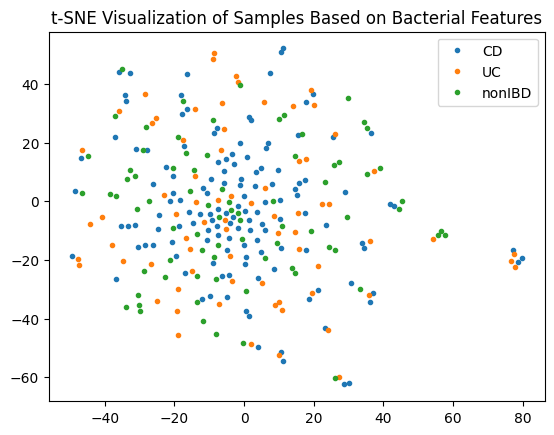

In [38]:
fig, ax = plt.subplots()
plt.title('t-SNE Visualization of Samples Based on Bacterial Features')
tmp = tsne_result1[tsne_result1["label"]==0]
ax.plot(tmp["t-SNE_1"], tmp["t-SNE_2"], marker='o', linestyle='', ms=3, label="CD")
tmp = tsne_result1[tsne_result1["label"]==1]
ax.plot(tmp["t-SNE_1"], tmp["t-SNE_2"], marker='o', linestyle='', ms=3, label="UC")
tmp = tsne_result1[tsne_result1["label"]==2]
ax.plot(tmp["t-SNE_1"], tmp["t-SNE_2"], marker='o', linestyle='', ms=3, label="nonIBD")
ax.legend()
plt.show()

This t-SNE plot visualizes the distribution of data using all the bacterial features. The points represent individual samples, colored according to their disease group: CD (blue), UC (orange), and nonIBD (green). While there is some degree of clustering, the groups show substantial overlap, suggesting that the bacterial features do not provide clear separation between the disease categories. The lack of distinct boundaries between the groups indicates that the dataset may have significant complexity or noise, making it challenging to differentiate the disease categories purely based on these features.

### 4.1.4 Feature importance

Creating a dataframe that contains the coefficients for each study group. 

In [39]:
attribute = train_X_filtered_std.columns
coefficient_CD = cls_std.coef_[0]
coefficient_UC = cls_std.coef_[1]
coefficient_nonIBD = cls_std.coef_[2]
model_parameters = pd.DataFrame({'attribute' : attribute, 'coefficient_CD' : coefficient_CD, 'coefficient_UC' : coefficient_UC,'coefficient_nonIBD' : coefficient_nonIBD})

model_parameters

,attribute,coefficient_CD,coefficient_UC,coefficient_nonIBD
0,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,-0.003548,0.003018,0.000531
1,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...,0.003984,-0.010559,0.006576
2,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,0.009106,-0.002921,-0.006185
3,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__P...,0.001415,-0.013938,0.012523
4,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,-0.005584,0.000501,0.005083
...,...,...,...,...
9306,d__Bacteria;p__Firmicutes;c__Bacilli;o__Tepidi...,0.005084,-0.003019,-0.002065
9307,d__Bacteria;p__Acidobacteriota;c__UBA6911;o__U...,0.005084,-0.003019,-0.002065
9308,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,0.005084,-0.003019,-0.002065
9309,d__Bacteria;p__Patescibacteria;c__Saccharimona...,0.009259,-0.006065,-0.003194


The absolute value of these coefficients give an indication of the feature importance in the classification. The higher the absolute value, the more significant the feature is in influencing the model's predictions.

In [40]:
#Calculate the absolute values of the coefficients for each class (CD, UC, nonIBD)
#Create a new DataFrame with these absolute values
#reorder the columns for easier interpretation of feature importance
model_parameters['coefficient_CD_abs'] = model_parameters['coefficient_CD'].map(abs)
model_parameters['coefficient_UC_abs'] = model_parameters['coefficient_UC'].map(abs)
model_parameters['coefficient_nonIBD_abs'] = model_parameters['coefficient_nonIBD'].map(abs)
new_order = ['attribute', 'coefficient_CD_abs', 'coefficient_UC_abs', 'coefficient_nonIBD_abs']
model_parameters_abs = model_parameters[new_order]
model_parameters_abs

,attribute,coefficient_CD_abs,coefficient_UC_abs,coefficient_nonIBD_abs
0,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.003548,0.003018,0.000531
1,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...,0.003984,0.010559,0.006576
2,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,0.009106,0.002921,0.006185
3,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__P...,0.001415,0.013938,0.012523
4,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,0.005584,0.000501,0.005083
...,...,...,...,...
9306,d__Bacteria;p__Firmicutes;c__Bacilli;o__Tepidi...,0.005084,0.003019,0.002065
9307,d__Bacteria;p__Acidobacteriota;c__UBA6911;o__U...,0.005084,0.003019,0.002065
9308,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,0.005084,0.003019,0.002065
9309,d__Bacteria;p__Patescibacteria;c__Saccharimona...,0.009259,0.006065,0.003194


Select the most important features for class 0 (CD).

In [41]:
columns_coefficient1 = ['attribute', 'coefficient_CD', 'coefficient_CD_abs']
coefficient1_df = model_parameters[columns_coefficient1]
coefficient1_df = coefficient1_df.sort_values(by = 'coefficient_CD_abs', ascending = False)
pd.set_option('display.max_colwidth', None) #change settings so that the full bacteria names are visible (the column width was too small)
coefficient1_df

,attribute,coefficient_CD,coefficient_CD_abs
182,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Acutalibacteraceae;g__Onthovicinus,-0.157867,0.157867
3871,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales_A;f__Rhizobiaceae_A;g__Falsochrobactrum,0.152074,0.152074
3803,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Cytophagales;f__Thermonemataceae;g__Thermonema,-0.147981,0.147981
270,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lacrimispora,-0.146465,0.146465
9075,d__Bacteria;p__DTU030;c__DTU030;o__DUMP01;f__DUMP01;g__DUNI01,0.132481,0.132481
...,...,...,...
5865,d__Bacteria;p__Elusimicrobiota;c__Elusimicrobia;o__Elusimicrobiales;f__UBA9959;g__YA12-FULL-51-18,-0.000006,0.000006
4402,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Actinomycetaceae;g__Scrofimicrobium,0.000004,0.000004
3288,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__VadinHA17;g__SLNP01,-0.000002,0.000002
6272,d__Bacteria;p__Cyanobacteria;c__Cyanobacteriia;o__Gloeomargaritales;f__Gloeomargaritaceae;g__JACYLR01,0.000002,0.000002


Select the most important features for class 1 (UC).

In [42]:
columns_coefficient2 = ['attribute', 'coefficient_UC', 'coefficient_UC_abs']
coefficient2_df = model_parameters[columns_coefficient2]
coefficient2_df = coefficient2_df.sort_values(by = 'coefficient_UC_abs', ascending = False)
coefficient2_df

,attribute,coefficient_UC,coefficient_UC_abs
270,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lacrimispora,1.899010e-01,1.899010e-01
49,d__Bacteria;p__Cyanobacteria;c__Cyanobacteriia;o__PCC-6307;f__Cyanobiaceae;g__Prochlorococcus,1.589127e-01,1.589127e-01
2490,d__Bacteria;p__Cyanobacteria;c__Cyanobacteriia;o__Cyanobacteriales;f__Nostocaceae;g__Cuspidothrix,1.242079e-01,1.242079e-01
7897,d__Bacteria;p__Patescibacteria;c__Paceibacteria;o__UBA9983;f__2-01-FULL-45-33;g__MFHE01,1.100910e-01,1.100910e-01
4334,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales_A;f__Enterobacteriaceae_A;g__Riesia,9.658134e-02,9.658134e-02
...,...,...,...
1725,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Acetobacterales;f__Acetobacteraceae;g__Rhodovarius,-8.917759e-06,8.917759e-06
5719,d__Bacteria;p__Methylomirabilota;c__Methylomirabilia;o__Rokubacteriales;f__CSP1-6;g__VGLJ01,-7.840761e-06,7.840761e-06
3546,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Caulobacterales;f__Maricaulaceae;g__JACOMS01,-3.980771e-06,3.980771e-06
6146,d__Bacteria;p__Gemmatimonadota;c__Gemmatimonadetes;o__Longimicrobiales;f__UBA6960;g__UBA1138,2.337386e-06,2.337386e-06


Select the most important features for class 2 (nonIBD).

In [43]:
columns_coefficient3 = ['attribute', 'coefficient_nonIBD', 'coefficient_nonIBD_abs']
coefficient3_df = model_parameters[columns_coefficient3]
coefficient3_df = coefficient3_df.sort_values(by = 'coefficient_nonIBD_abs', ascending = False)
coefficient3_df

,attribute,coefficient_nonIBD,coefficient_nonIBD_abs
182,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Acutalibacteraceae;g__Onthovicinus,0.233086,0.233086
3803,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Cytophagales;f__Thermonemataceae;g__Thermonema,0.182611,0.182611
848,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Anaerovoracaceae;g__Eubacterium_B,0.140682,0.140682
3871,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales_A;f__Rhizobiaceae_A;g__Falsochrobactrum,-0.121760,0.121760
1863,d__Bacteria;p__Firmicutes;c__Bacilli;o__Alicyclobacillales;f__Alicyclobacillaceae;g__Alicyclobacillus_B,0.114573,0.114573
...,...,...,...
6225,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__CAJTWN01,0.000008,0.000008
7035,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Saccharofermentanales;f__Saccharofermentanaceae;g__JAAYCT01,0.000004,0.000004
2012,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__UMGS1889,0.000003,0.000003
1070,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Acutalibacteraceae;g__UBA1213,-0.000003,0.000003


Select the 10 most important features for classification for each of the 3 classes, by selecting the features with the hightest absolute value for the coefficient.

In [44]:
best_coefficient1 = coefficient1_df.iloc[:10]
best_coefficient2 = coefficient2_df.iloc[:10]
best_coefficient3 = coefficient3_df.iloc[:10]

Create a list of the names of the most important features for classification.

In [45]:
selected_attributes1 = list(best_coefficient1.loc[:,'attribute'] )
selected_attributes2 = list(best_coefficient2.loc[:,'attribute'] )
selected_attributes3 = list(best_coefficient3.loc[:,'attribute'] )
selected_attributes_tot = selected_attributes1 + selected_attributes2 + selected_attributes3
selected_attributes_tot

['d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Acutalibacteraceae;g__Onthovicinus',
 'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales_A;f__Rhizobiaceae_A;g__Falsochrobactrum',
 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Cytophagales;f__Thermonemataceae;g__Thermonema',
 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lacrimispora',
 'd__Bacteria;p__DTU030;c__DTU030;o__DUMP01;f__DUMP01;g__DUNI01',
 'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Caulobacterales;f__Parvularculaceae;g__Parvularcula',
 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Anaerovoracaceae;g__Eubacterium_B',
 'd__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales_G;f__Sporolactobacillaceae;g__Sporolactobacillus',
 'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Burkholderiaceae;g__JADJWR01',
 'd__Bacteria;p__Cyanobacteria;c__Cyanobacteriia;o__PCC-6307;f__Cyanobiaceae;g__Prochlorococ

Remove any duplicates from the list of the most important features for classification.

In [46]:
unique_attributes = list(set(selected_attributes_tot))
print(unique_attributes)
print(f'There were {30 - len(unique_attributes)} duplicates in the list removed, so now there are {len(unique_attributes)} features left in the list.')

['d__Bacteria;p__Myxococcota_A;c__UBA9160;o__UBA9160;f__UBA4427;g__JADJOR01', 'd__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales_G;f__Sporolactobacillaceae;g__Sporolactobacillus', 'd__Bacteria;p__Spirochaetota;c__Leptospirae;o__Leptospirales;f__Leptospiraceae;g__Leptospira', 'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Caulobacterales;f__Parvularculaceae;g__Parvularcula', 'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Burkholderiaceae;g__JADJWR01', 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Clostridium_N', 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Acutalibacteraceae;g__Onthovicinus', 'd__Bacteria;p__DTU030;c__DTU030;o__DUMP01;f__DUMP01;g__DUNI01', 'd__Bacteria;p__Cyanobacteria;c__Cyanobacteriia;o__PCC-6307;f__Cyanobiaceae;g__Prochlorococcus', 'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Methylococcales;f__Methylomonadaceae;g__JABFRC01', 'd__Bacteria;p__Proteobacteria;c__

These are the 20 most important features for classification, as determined by the multinomial logistic regression model.

### 4.1.5 Logistic regression model with less features

Train a logsitic regression model on the train set that contains only the standardized features for the most important bacteria for classification (unique_attributes).

In [47]:
cls_std.fit(train_X_filtered_std[unique_attributes],train_y)

LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial')

Print the prediction accuracy on the corresponding test set.

In [48]:
print("Accuracy: {}".format(cls_std.score(test_X_filtered_std[unique_attributes],test_y)))

Accuracy: 0.4479166666666667


The accuracy increased from 0.39 to 0.45 after reducing the number of features to 20, focusing only on the most important bacteria for classification (CD, UC or nonIBD). Although the model improved, it is still not optimal.

**onderstaande metric codes moeten nog gecontroleerd worden qua variabele namen, nu heb ik ze even gecopy paste**

Calculate the recall for each study group. 


In [49]:
recall_per_class = recall_score(test_y, predictions_std, average=None)
for i, recall in enumerate(recall_per_class):
    print(f"Recall for class {i}: {recall}")

Recall for class 0: 0.5476190476190477
Recall for class 1: 0.32142857142857145
Recall for class 2: 0.19230769230769232


Calculate the recall macro. **is dit nodig?**

In [50]:
#calculate the macro-average recall score across all classes, treating all classes equally regardless of their size
recall = recall_score(test_y, predictions_std, average='macro')
print(f"Recall (macro): {recall:.2f}")

Recall (macro): 0.35


Calculate the precision score.


In [51]:
# Calculate the precision score for each class
precision_per_class = precision_score(test_y, predictions_std, average=None) #average=None means that the precision score will be computed separately for each class

# Print the precision for each class
for i, precision in enumerate(precision_per_class):
    print(f"Precision for class {i}: {precision}")

Precision for class 0: 0.40350877192982454
Precision for class 1: 0.375
Precision for class 2: 0.3333333333333333


Calculate the F1-score.

In [52]:
f1 = f1_score(test_y, predictions_std, average='macro') #average='macro' evaluates each class equally, without considering the size of the class
print(f'F1-score: {f1}')

F1-score: 0.35156758327490034


### 4.1.6 Visualisation using t-SNE

t-SNE will be used again to visualise the 20 most important bacteria for classification of the training data. As said earlier, t-SNE is a dimensionality reduction technique that transforms high-dimensional data into a 2D or 3D representation. Since it preserves local structures like clusters, this technique is useful for visualizing patterns or groups in complex datasets. By examining the clustering and potential overlap, it can be evaluated if the classes (CD, UC, nonIBD) are hard to distinguish or not.

In [53]:
from sklearn.manifold import TSNE

model_tSNE = TSNE(n_components=2, perplexity=10, random_state=1)

In [54]:
train_X_filtered_std_20 = train_X_filtered_std[unique_attributes]
X_embedded2 = model_tSNE.fit_transform(train_X_filtered_std_20)

Saving the results from above into a DataFrame.

In [55]:
tsne_result2 = pd.DataFrame(X_embedded2, columns=["t-SNE_1","t-SNE_2"])
tsne_result2["label"] = train_y
tsne_result2

,t-SNE_1,t-SNE_2,label
0,5.389369,26.444387,0
1,1.658030,46.437271,1
2,3.617142,-13.532088,0
3,27.171135,26.980558,0
4,-6.567452,4.572042,2
...,...,...,...
281,28.616322,-4.429324,1
282,4.616933,19.807274,0
283,-6.012288,22.479258,0
284,9.993629,-21.585958,0


The 2D coordinates above are visualised in a 2D plot with the code below. This way, identification of clusters and/or overlap between the different classes is possible.

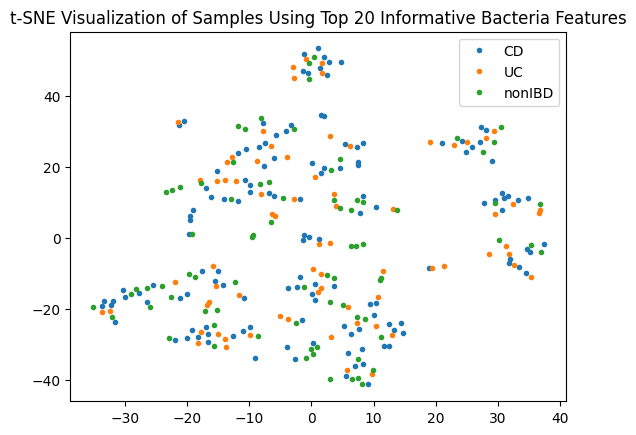

In [56]:
fig, ax = plt.subplots()
plt.title('t-SNE Visualization of Samples Using Top 20 Informative Bacteria Features')
tmp = tsne_result2[tsne_result2["label"]==0]
ax.plot(tmp["t-SNE_1"], tmp["t-SNE_2"], marker='o', linestyle='', ms=3, label="CD")
tmp = tsne_result2[tsne_result2["label"]==1]
ax.plot(tmp["t-SNE_1"], tmp["t-SNE_2"], marker='o', linestyle='', ms=3, label="UC")
tmp = tsne_result2[tsne_result2["label"]==2]
ax.plot(tmp["t-SNE_1"], tmp["t-SNE_2"], marker='o', linestyle='', ms=3, label="nonIBD")
ax.legend()
plt.show()

This t-SNE plot focuses on the 20 most informative bacteria for classification (features selected using logistic regression). Unlike the first plot, which used the full training dataset, this plot shows more distinct groupings of samples.

Some small local clusters appear within the same study group, but many clusters still contain a mix of the three study groups.

While there is still overlap between the groups, the separation has improved compared to the first plot, indicating that these 20 bacteria carry more meaningful information for classification. The formation of some clusters explains why the model's accuracy improved after reducing the dataset to these 20 features. However, because no clear clusters completely separate the study groups, the accuracy remains too low for reliable predictions.

## 4.2 Decision Tree Classifier

Decision tree classifier does not need standardised data. This is why the train_X_filtered and test_X_filtered data will be used.

In [57]:
from sklearn.tree import DecisionTreeClassifier

# Define model. Specify a number for random_state to ensure the same results each run
dtc = DecisionTreeClassifier(random_state=1)

# Fit model
dtc.fit(train_X_filtered, train_y)

DecisionTreeClassifier(random_state=1)

Make predictions with validation data.

In [58]:
predictions_dtc = dtc.predict(test_X_filtered)
print(predictions_dtc)

[1 0 2 2 0 0 0 0 0 1 0 0 0 2 1 1 0 1 2 1 1 1 0 0 0 2 1 1 1 1 0 0 1 2 2 0 0
 1 0 2 2 2 2 0 2 2 1 2 0 0 2 2 1 0 2 0 2 1 1 0 0 2 0 0 0 1 2 0 0 1 2 0 0 0
 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1]


Calculate the accuracy of the decision tree classifier.

In [59]:
dtc.score(test_X_filtered, test_y)

0.4791666666666667

The accuracy of this model is better than the one of the logistic regression model. About 47% of the samples are predicted correctly. However, the accuracy is still too low for the model to be considered a good prediction model.

**onderstaande metrics codes moeten nog gecontroleerd worden, nu gwn een copy paste**

Calculate the recall for each study group. 


In [60]:
recall_per_class = recall_score(test_y, predictions_std, average=None)
for i, recall in enumerate(recall_per_class):
    print(f"Recall for class {i}: {recall}")

Recall for class 0: 0.5476190476190477
Recall for class 1: 0.32142857142857145
Recall for class 2: 0.19230769230769232


**recall macro nodig?**

Calculate the precision score.


In [61]:
# Calculate the precision score for each class
precision_per_class = precision_score(test_y, predictions_std, average=None) #average=None means that the precision score will be computed separately for each class

# Print the precision for each class
for i, precision in enumerate(precision_per_class):
    print(f"Precision for class {i}: {precision}")

Precision for class 0: 0.40350877192982454
Precision for class 1: 0.375
Precision for class 2: 0.3333333333333333


Calculate the F1-score.


In [62]:
f1 = f1_score(test_y, predictions_std, average='macro') #average='macro' evaluates each class equally, without considering the size of the class
print(f'F1-score: {f1}')

F1-score: 0.35156758327490034


In [63]:
# Get the number of leaf nodes in the fitted tree
num_leaf_nodes = dtc.get_n_leaves()
print(f"Number of leaf nodes: {num_leaf_nodes}")

Number of leaf nodes: 43


The number of leaf nodes should not be too high, as it may indicate that the decision tree is making too many unnecessary splits. In this case, with 43 leaf nodes, the model complexity seems reasonable and could be appropriate.

Visualise overfitting or underfitting using cross validation.

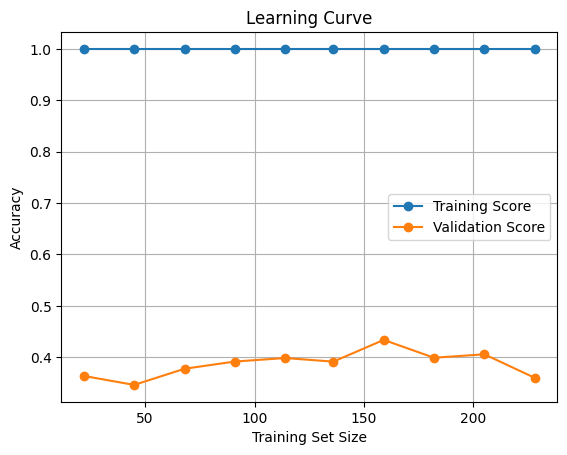

In [64]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, val_scores = learning_curve(
    dtc, train_X_filtered, train_y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), random_state=1
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training Score", marker='o')
plt.plot(train_sizes, val_mean, label="Validation Score", marker='o')

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()

This learning curve indicates that the model is overfitting, because of the gap between the two curves. The training accuracy is 1.0, meaning the model perfectly fits the training data, likely memorizing it, including noise. The validation score is much lower (around 0.4) and does not improve, showing that the model struggles to generalize to new data.

## 4.3 Random forest classifier

The random forest classifier combines the predictions of multiple decision trees, making its final prediction by averaging their outputs. This approach typically results in significantly better predictive accuracy than a single decision tree. Therefore, the random forest classifier model will be applied to our data, and its performance will be evaluated to determine if its accuracy is indeed better than the one of the decision tree classifier.

In [65]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state = 1)
forest_model.fit(train_X_filtered, train_y)

RandomForestClassifier(random_state=1)

In [66]:
prediction_forest = forest_model.predict(test_X_filtered)
prediction_forest

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

Calculate the accuracy of the random forest classifier.

In [67]:
forest_model.score(test_X_filtered, test_y)

0.4479166666666667

Approximately 45% of the samples are predicted correctly using the random forest classifier. However, the accuracy remains too low for the model to be considered reliable for prediction.

**code moet nog gecontroleerd worden van de metrics**

Calculate the recall for each study group. 


In [68]:
recall_per_class = recall_score(test_y, predictions_std, average=None)
for i, recall in enumerate(recall_per_class):
    print(f"Recall for class {i}: {recall}")

Recall for class 0: 0.5476190476190477
Recall for class 1: 0.32142857142857145
Recall for class 2: 0.19230769230769232


**recall macro nodig?**

Calculate the precision score.


In [69]:
# Calculate the precision score for each class
precision_per_class = precision_score(test_y, predictions_std, average=None) #average=None means that the precision score will be computed separately for each class

# Print the precision for each class
for i, precision in enumerate(precision_per_class):
    print(f"Precision for class {i}: {precision}")

Precision for class 0: 0.40350877192982454
Precision for class 1: 0.375
Precision for class 2: 0.3333333333333333


Calculate the F1-score.


In [70]:
f1 = f1_score(test_y, predictions_std, average='macro') #average='macro' evaluates each class equally, without considering the size of the class
print(f'F1-score: {f1}')

F1-score: 0.35156758327490034


Using cross-validation, potential overfitting or underfitting will be visualised.

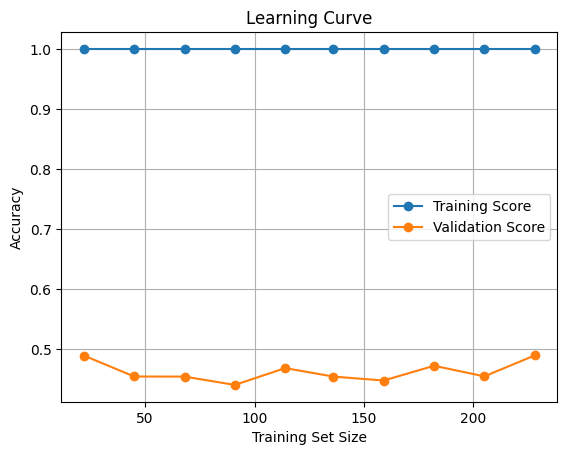

In [71]:
train_sizes, train_scores, val_scores = learning_curve(
    forest_model, train_X_filtered, train_y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), random_state=1
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training Score", marker='o')
plt.plot(train_sizes, val_mean, label="Validation Score", marker='o')

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()

The plot is similar to the one shown for the decision tree classifier. The model still appears to be overfitting, which can be seen by the gap between the two curves. This indicates that the model performs well on the training data but poorly on unseen data. Reducing the number of features may help decrease noise in the dataset and improve generalization.

**nog een besluit welk model dan beste is ofzo?? Of is dat niet nodig/niet de bedoeling? of een besluit dat onze data niet goed zijn hiervoor ofzo idk**